In [1]:
from Hilbert2D import Hilbert2D
from Hilbert3D import Hilbert3D

/home/eliska/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/eliska/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


# 2D Hilbertova křivka 

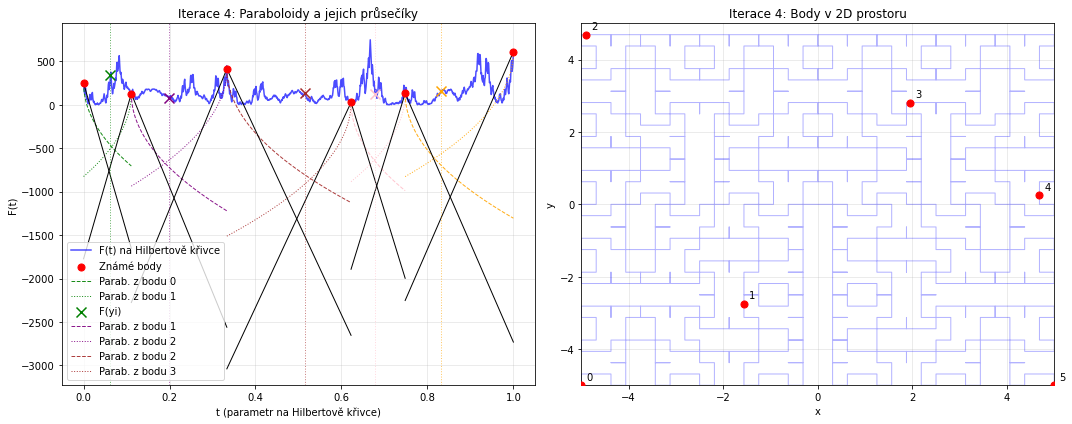

In [2]:
hilbert = Hilbert2D(15)
# Vykreslí paraboloidy v první iteraci (iteration_to_plot=0)
hilbert.plot_holder_paraboloids(H=100, r=3, eps=1e-4, max_iter=10, 
                                n=5, x_min=-5, x_max=5, y_min=-5, y_max=5, 
                                whatFunc=1, iteration_to_plot=4)

## Test mezivýpočtů pro výpočet bodu křivky 

In [3]:

h2d = Hilbert2D(15)

Q = h2d.dec_to_quarter(0.2)
print("Quarter Q:", Q)

e0, dj = h2d.ej_and_dj_counter(Q)
result = h2d.calculate_point(e0, dj, Q)
print("Calculated point:", result)


Quarter Q: [0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0]
Calculated point: [[0.20001221]
 [0.40002441]]


In [4]:

h = [2, 0, 3]
e0, dj = h2d.ej_and_dj_counter(h)
print("e0:", e0)
print("dj:", dj)

result = h2d.calculate_point(e0, dj, h)
print("Point from [2,0,3]:", result)

e0: [0. 0. 1.]
dj: [0. 0. 1.]
Point from [2,0,3]: [[0.625]
 [0.75 ]]


##  Hledání minima za využití algoritmu z knihovny scipy.optimize

In [5]:
print("Opravdové minimum f = 1.0")
for n in [2,3,4,5,6,7,8,25]:
    h2d = Hilbert2D(10)
    t_min, h_min, f_min = h2d.find_minimum_mapped(n,0,1,0,1,0)
    print(f"precision={n:3d}  =>  t = {t_min:.6f},  h(t) = ({h_min[0]:.4f}, {h_min[1]:.4f}),  f = {f_min:.6f}")

Opravdové minimum f = 1.0
precision=  2  =>  t = 0.387500,  h(t) = (0.3000, 0.7500),  f = 1.001250
precision=  3  =>  t = 0.375001,  h(t) = (0.2500, 0.7500),  f = 1.002501
precision=  4  =>  t = 0.378125,  h(t) = (0.3000, 0.7500),  f = 1.001250
precision=  5  =>  t = 0.377539,  h(t) = (0.3000, 0.7812),  f = 1.003301
precision=  6  =>  t = 0.376954,  h(t) = (0.2812, 0.7813),  f = 1.003480
precision=  7  =>  t = 0.378661,  h(t) = (0.2968, 0.7500),  f = 1.001255
precision=  8  =>  t = 0.382246,  h(t) = (0.3286, 0.7852),  f = 1.004034
precision= 25  =>  t = 0.378922,  h(t) = (0.3125, 0.7539),  f = 1.001531


In [6]:

print("Opravdové minimum f = -1.0")
for n in [2,3,4,5,6,7,8,10,11,12,13]:
    h2d = Hilbert2D(10)
    t_min, h_min, f_min = h2d.find_minimum_mapped(n,-5,5,-5,5,1)
    print(f"precision={n:3d}  =>  t = {t_min:.6f},  h(t) = ({h_min[0]:.4f}, {h_min[1]:.4f}),  f = {f_min:.6f}")

Opravdové minimum f = -1.0
precision=  2  =>  t = 0.633790,  h(t) = (2.8516, 2.5000),  f = 4.552424
precision=  3  =>  t = 0.382803,  h(t) = (-2.5000, 3.1242),  f = 2.711152
precision=  4  =>  t = 0.367132,  h(t) = (-3.1250, 3.1339),  f = 3.700411
precision=  5  =>  t = 0.361333,  h(t) = (-2.8141, 3.4375),  f = 4.136436
precision=  6  =>  t = 0.361573,  h(t) = (-2.8131, 3.2812),  f = 0.947096
precision=  7  =>  t = 0.361636,  h(t) = (-2.8164, 3.2031),  f = 0.215062
precision=  8  =>  t = 0.361650,  h(t) = (-2.8154, 3.1641),  f = 0.046597
precision= 10  =>  t = 0.361653,  h(t) = (-2.8125, 3.1421),  f = 0.006380
precision= 11  =>  t = 0.361653,  h(t) = (-2.8125, 3.1398),  f = 0.004590
precision= 12  =>  t = 0.361652,  h(t) = (-2.8223, 3.1445),  f = 0.016368
precision= 13  =>  t = 0.361652,  h(t) = (-2.8223, 3.1445),  f = 0.016368


In [7]:
print("Opravdové minimum f = 0.0")
for n in [2,3,4,5,6,7,8]:
    h2d = Hilbert2D(10)
    t_min, h_min, f_min = h2d.find_minimum_mapped(n,-10,10,-10,10,2)
    print(f"precision={n:3d}  =>  t = {t_min:.6f},  h(t) = ({h_min[0]:.4f}, {h_min[1]:.4f}),  f = {f_min:.6f}")

Opravdové minimum f = 0.0
precision=  2  =>  t = 0.620192,  h(t) = (4.6154, 5.0000),  f = 0.961538
precision=  3  =>  t = 0.625000,  h(t) = (5.0000, 5.0001),  f = 1.000011
precision=  4  =>  t = 0.531251,  h(t) = (2.5003, 2.5000),  f = 0.250027
precision=  5  =>  t = 0.530950,  h(t) = (2.5000, 2.3077),  f = 0.240385
precision=  6  =>  t = 0.531249,  h(t) = (2.5011, 2.5000),  f = 0.250109
precision=  7  =>  t = 0.531190,  h(t) = (2.5000, 2.3455),  f = 0.240756
precision=  8  =>  t = 0.557208,  h(t) = (0.2968, 2.5781),  f = 1.383801


## Hledání minima za pomoci Hoelderova algoritmu

## Pro vlastní funkci


    Iterace n  Rozdíl Hoelder  Rozdíl scipy     Rozdíl DE
0           1        0.020000      0.020000  2.220446e-16
1           2        0.001251      0.001250  2.220446e-16
2           3        0.002597      0.002501  2.220446e-16
3           4        0.000109      0.001250  2.220446e-16
4           5        0.000078      0.003301  2.220446e-16
5           6        0.000453      0.003480  2.220446e-16
6           7        0.000165      0.001255  2.220446e-16
7           8        0.000122      0.004034  2.220446e-16
8           9        0.000162      0.003553  2.220446e-16
9          10        0.000087      0.001426  2.220446e-16
10         11        0.000078      0.003451  2.220446e-16
11         12        0.000013      0.003408  2.220446e-16
12         13        0.000032      0.003491  2.220446e-16
13         14        0.000035      0.003633  2.220446e-16
14         15        0.000049      0.001320  2.220446e-16
15         16        0.000092      0.001782  2.220446e-16
16         17 

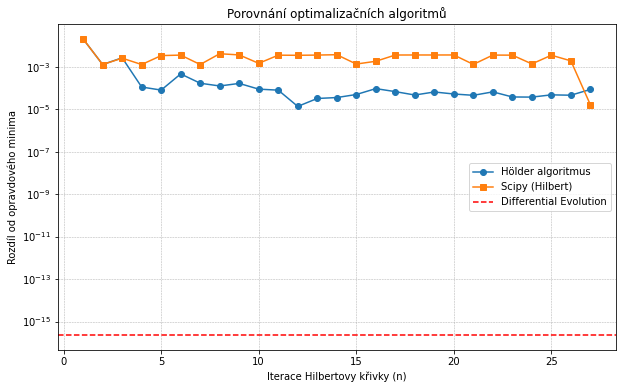

In [9]:
h2d = Hilbert2D(50)

H =1
r = 3
eps = 1e-5
N_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
max_iter = 250

df = h2d.compare_algorithms(H, r, eps, max_iter, N_vals, 0, 1, 0, 1, 0, 1.0)

Porovnání Holderovských konstant

In [ ]:
analysis_df = h2d.analyze_holder_constants(H, r, eps, max_iter, N_vals, 0, 1, 0, 1, 0)
print(analysis_df)
    

     n  H opravdové   H průměr  H finální
0    1            1   1.196326   1.211635
1    2            1   2.453582   2.553201
2    3            1   4.517970   4.838788
3    4            1   5.681390   6.567369
4    5            1   6.469741   7.840008
5    6            1   7.552559  10.671028
6    7            1   7.390605  10.348886
7    8            1   7.845789  12.477186
8    9            1   7.577654  10.153920
9   10            1   8.216750  11.002123
10  11            1   8.471276  11.686894
11  12            1   8.500650  12.444353
12  13            1   8.724997  12.530226
13  14            1   8.014736  11.320846
14  15            1   7.676405  10.881782
15  16            1   8.095186  13.066702
16  17            1   7.900687  11.093949
17  18            1   9.275688  11.919073
18  19            1   8.446714  12.959820
19  20            1   7.728348  10.616408
20  21            1   8.272433  12.842665
21  22            1   7.454625  11.423069
22  23            1   7.894448  11

In [ ]:
H = 2 * 1.4142 * 5**(1/2)   # Lipschitz/Hölder odhad
r = 1.1
eps = 1e-5
N = [1,2,3,4,5,6,7,8,9,10,20,25] 
max_iter = 100
print("Opravdové minimum f = 1.0")
for n in N:
    t_min, f_min, x_min, y_min,_ = h2d.Holder_algorithm_mapped(H, r, eps, max_iter,n,0,1,0,1,0)
    print(f"Iterace hilbertovy křivky: {n}")
    print(f"  Souřadnice (x,y): ({x_min}, {y_min})")
    print(f"  Hodnota f: {f_min}")
    print("-" * 40)

Opravdové minimum f = 1.0
Iterace hilbertovy křivky: 1
  Souřadnice (x,y): (0.30026602136090397, 0.5)
  Hodnota f: 1.0200000353836822
----------------------------------------
Iterace hilbertovy křivky: 2
  Souřadnice (x,y): (0.3000622247904108, 0.75)
  Hodnota f: 1.0012500019359623
----------------------------------------
Iterace hilbertovy křivky: 3
  Souřadnice (x,y): (0.25, 0.7504452693103598)
  Hodnota f: 1.0025223625978974
----------------------------------------
Iterace hilbertovy křivky: 4
  Souřadnice (x,y): (0.3125, 0.7004792675849147)
  Hodnota f: 1.000078239848709
----------------------------------------
Iterace hilbertovy křivky: 5
  Souřadnice (x,y): (0.29980741009447165, 0.6875)
  Hodnota f: 1.0000781435454358
----------------------------------------
Iterace hilbertovy křivky: 6
Iterace hilbertovy křivky: 4
  Souřadnice (x,y): (0.3125, 0.7004792675849147)
  Hodnota f: 1.000078239848709
----------------------------------------
Iterace hilbertovy křivky: 5
  Souřadnice (x,y

## Pro Himmelblauovu funkci 

    Iterace n  Rozdíl Hoelder  Rozdíl scipy     Rozdíl DE
0           1       13.272704     13.272704  2.209671e-10
1           2        4.552788      4.552424  2.209671e-10
2           3        2.800083      2.711152  2.209671e-10
3           4        0.280961      3.700411  2.209671e-10
4           5        0.441283      4.136436  2.209671e-10
5           6        0.804339      0.947096  2.209671e-10
6           7        0.990338      0.215062  2.209671e-10
7           8        0.963969      0.046597  2.209671e-10
8           9        0.211010      0.023605  2.209671e-10
9          10        0.342596      0.006380  2.209671e-10
10         11        0.532243      0.008561  2.209671e-10
11         12        1.489874      0.012267  2.209671e-10
12         13        0.469994      0.006108  2.209671e-10
13         14        0.470412      0.009151  2.209671e-10
14         15        1.946281      0.005140  2.209671e-10
15         16        0.653055      0.136017  2.209671e-10
16         17 

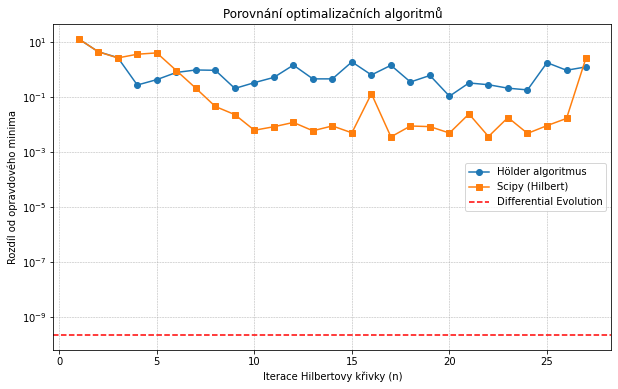

In [ ]:
H = 655.35
r = 2
eps = 1e-5
N_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
max_iter = 250

df = h2d.compare_algorithms(H, r, eps, max_iter,N_vals,-5,5,-5,5,1,0.0)

In [ ]:
analysis_df = h2d.analyze_holder_constants(H, r, eps, max_iter,N_vals,-5,5,-5,5,1)
print(analysis_df)

     n  H opravdové      H průměr     H finální
0    1       655.35   5035.976876   5309.879035
1    2       655.35   8896.419140   9743.662713
2    3       655.35  19496.520135  23712.176432
3    4       655.35  28211.919845  38574.295479
4    5       655.35  31324.434968  54877.054189
5    6       655.35  29600.766272  42906.894213
6    7       655.35  31662.903981  64542.516206
7    8       655.35  40246.019859  80681.339341
8    9       655.35  34760.749740  62877.105179
9   10       655.35  31933.038966  53593.700223
10  11       655.35  32666.956532  59181.032016
11  12       655.35  40559.375736  74681.843921
12  13       655.35  30633.772844  62256.833373
13  14       655.35  31532.561530  54330.778870
14  15       655.35  32259.489370  64197.650353
15  16       655.35  42843.123482  88761.123127
16  17       655.35  35629.237211  56095.645381
17  18       655.35  32941.294112  51992.199522
18  19       655.35  31814.958586  56720.366689
19  20       655.35  33395.831548  61291

## Pro Matyasovu funkci

    Iterace n  Rozdíl Hoelder  Rozdíl scipy     Rozdíl DE
0           1    9.615385e-01      0.000000  5.372075e-09
1           2    7.822674e-08      0.240385  5.372075e-09
2           3    6.009617e-02      0.250003  5.372075e-09
3           4    1.094475e-06      0.062507  5.372075e-09
4           5    1.826025e-07      0.060096  5.372075e-09
5           6    1.115399e-03      0.062527  5.372075e-09
6           7    1.578364e-03      0.060189  5.372075e-09
7           8    1.768751e-03      0.345950  5.372075e-09
8           9    6.566797e-04      0.061891  5.372075e-09
9          10    2.308072e-03      0.061022  5.372075e-09
10         11    1.497171e-05      0.070131  5.372075e-09
11         12    3.246390e-03      0.060193  5.372075e-09
12         13    2.169921e-03      0.064508  5.372075e-09
13         14    1.527113e-03      0.060652  5.372075e-09
14         15    7.586904e-04      0.248869  5.372075e-09
15         16    1.869814e-03      0.253885  5.372075e-09
16         17 

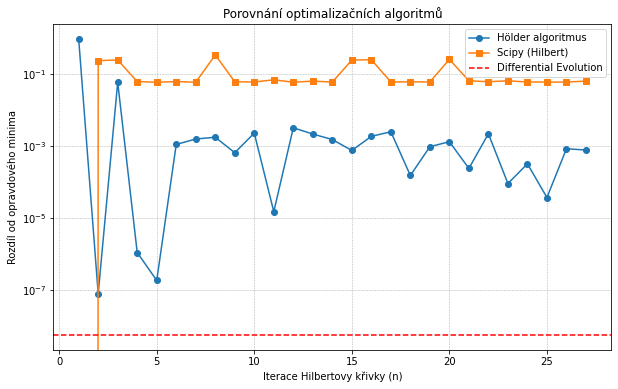

In [ ]:
H = 7.07
r = 1.1
eps = 1e-5
N_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
max_iter = 250

df = h2d.compare_algorithms(H, r, eps, max_iter,N_vals,-5,5,-5,5,2,0.0)

In [ ]:
comparison_df = h2d.analyze_holder_constants(H, r, eps, max_iter,N_vals,-5,5,-5,5,2)
print(comparison_df)

     n  H opravdové    H průměr   H finální
0    1         7.07   26.150376   26.164601
1    2         7.07  101.241994  103.192589
2    3         7.07   45.349275   45.840169
3    4         7.07  255.499389  305.860175
4    5         7.07  112.641923  115.294241
5    6         7.07  349.723320  369.625056
6    7         7.07  315.054272  338.468674
7    8         7.07  309.859670  419.739091
8    9         7.07  341.811022  542.071520
9   10         7.07  249.627366  590.310744
10  11         7.07  293.378615  439.671573
11  12         7.07  351.887882  452.627313
12  13         7.07  347.801594  526.251639
13  14         7.07  349.933682  459.559533
14  15         7.07  319.590924  401.795000
15  16         7.07  261.451312  319.324106
16  17         7.07  290.331251  520.141261
17  18         7.07  299.454794  523.433271
18  19         7.07  299.859692  390.782204
19  20         7.07  350.731583  420.844104
20  21         7.07  260.210377  293.222867
21  22         7.07  283.687802 

In [ ]:
H = 2 * 1.4142 * 5**(1/2)   # Lipschitz/Hölder odhad
r = 1.1
eps = 1e-5
N = [1,2,3,4,5,6,7,8,9,10,20,21,22,23,24,25,26,27] 
max_iter = 100
print("Opravdové minimum f = 0.0")
for n in N:
    t_min, f_min, x_min, y_min,_ = h2d.Holder_algorithm_mapped(H, r, eps, max_iter,n,-5,5,-5,5,1)
    print(f"Iterace hilbertovy křivky: {n}")
    print(f"  Souřadnice (x,y): ({x_min}, {y_min})")
    print(f"  Hodnota f: {f_min}")
    print("-" * 40)

Opravdové minimum f = 0.0
Iterace hilbertovy křivky: 1
  Souřadnice (x,y): (3.395495770197954, 0.0)
  Hodnota f: 13.27270612986027
----------------------------------------
Iterace hilbertovy křivky: 2
  Souřadnice (x,y): (2.848338434538067, 2.5)
  Hodnota f: 4.55276854451923
----------------------------------------
Iterace hilbertovy křivky: 3Iterace hilbertovy křivky: 2
  Souřadnice (x,y): (2.848338434538067, 2.5)
  Hodnota f: 4.55276854451923
----------------------------------------
Iterace hilbertovy křivky: 3
  Souřadnice (x,y): (-2.5, 3.1226663107107875)
  Hodnota f: 2.7112384721107325
----------------------------------------
Iterace hilbertovy křivky: 4
  Souřadnice (x,y): (3.125, 1.6985291330770202)
  Hodnota f: 1.1955366517494381
----------------------------------------
Iterace hilbertovy křivky: 5
  Souřadnice (x,y): (3.065996234052122, 1.875)
  Hodnota f: 0.25084900159527407
----------------------------------------
Iterace hilbertovy křivky: 6
  Souřadnice (x,y): (3.125, 1.73

In [ ]:
H = 2 * 1.4142 * 5**(1/2)   # Lipschitz/Hölder odhad
r = 1.1
eps = 1e-5
N = [1,2,3,4,5,6,7,8,9,10,20,21,22,23,24,25,26,27] 
max_iter = 100
print("Opravdové minimum f = 0.0")
for n in N:
    t_min, f_min, x_min, y_min,_ = h2d.Holder_algorithm_mapped(H, r, eps, max_iter,n,-10,10,-10,10,2)
    print(f"Iterace hilbertovy křivky: {n}")
    print(f"  Souřadnice (x,y): ({x_min}, {y_min})")
    print(f"  Hodnota f: {f_min}")
    print("-" * 40)

Opravdové minimum f = 0.0
Iterace hilbertovy křivky: 1
  Souřadnice (x,y): (-10.0, -9.229332587136387)
  Hodnota f: 3.846154382779531
----------------------------------------
Iterace hilbertovy křivky: 2
  Souřadnice (x,y): (0.0, 0.01563664228597439)
  Hodnota f: 6.357119131467583e-05
----------------------------------------
Iterace hilbertovy křivky: 3
  Souřadnice (x,y): (-2.5, -2.3086449189064018)
  Hodnota f: 0.24038485132632825
----------------------------------------
Iterace hilbertovy křivky: 4
  Souřadnice (x,y): (1.0157558366390873, 1.25)
  Hodnota f: 0.06505407712980449
----------------------------------------
Iterace hilbertovy křivky: 5
  Souřadnice (x,y): (-0.017558101823347272, 0.0)
  Hodnota f: 8.015460430614801e-05
----------------------------------------
Iterace hilbertovy křivky: 6
  Souřadnice (x,y): (-0.6170207241718373, -0.625)
  Hodnota f: 0.01544207200340883
----------------------------------------
Iterace hilbertovy křivky: 7
  Souřadnice (x,y): (0.9375, 0.75619

## Vykreslení grafů Hilbertovy křivky

Bod na aproximačním polygonu: [0.2   0.375]


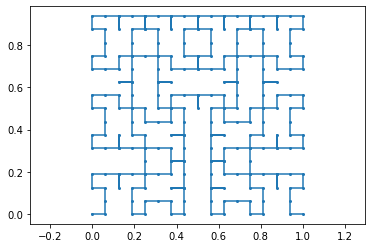

[1. 0.]


In [ ]:
n = 4 
t = 0.2  

bod_na_polygonu = h2d.hilbert_polygon_point(t,n)
print("Bod na aproximačním polygonu:", bod_na_polygonu)

h2d.plot_hilbert_polygon(n)  
print(h2d.hilbert_polygon_point(1.0,n))

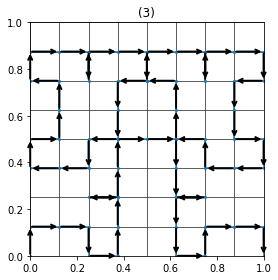

In [ ]:
h2d.plot_multiple_hilberts_arrows([3])

## Vykreslení grafů pro Hilbertovu křivku s posunutím

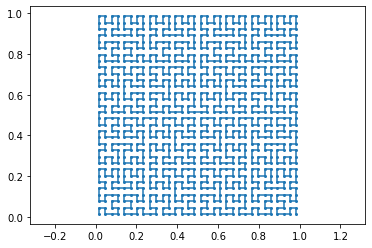

In [ ]:
h2da = Hilbert2D(15)
h2da.plot_mainstream_hilbert_polygon(5)  


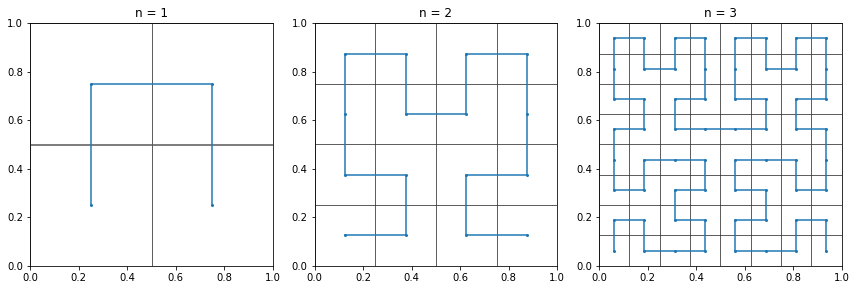

In [ ]:
h2da.plot_multiple_hilberts([1, 2, 3])

# 3D Hilbertova křivka

## Test mezivýpočtů bodu křivky

In [ ]:
h3d = Hilbert3D(20)


h2d_converter = Hilbert3D(20)
L = h2d_converter.dec_to_octal(0.2)
print("Octal L:", L)

h = [2, 0, 6]
result = h3d.ThreeD_Hilbert(h)
print("3D result:", result)




Octal L: [1, 4, 6, 3, 1, 4, 6, 3, 1, 4, 6, 3, 1, 4, 6, 3, 1, 5, 0, 0]
3D result: [0.625 0.75  0.125]


## Hledání minima za pomoci algoritmu z knihovny scipy.optimize

In [ ]:
for n in [2,3,4,5,6,7,8]:
    h3d = Hilbert3D(10)
    t_min, h_min, f_min = h3d.find_minimum(n)
    print(f"precision={n:3d}  =>  t = {t_min:.6f},  h(t) = ({h_min[0]:.4f}, {h_min[1]:.4f}, {h_min[2]:.4f}),  f = {f_min:.6f}")

precision=  2  =>  t = 0.237500,  h(t) = (0.5000, 0.7000, 0.0000),  f = 1.020000
precision=  3  =>  t = 0.236326,  h(t) = (0.3752, 0.7500, 0.0000),  f = 1.004074
precision=  4  =>  t = 0.236768,  h(t) = (0.3125, 0.7000, 0.0000),  f = 1.000078
precision=  5  =>  t = 0.236084,  h(t) = (0.3750, 0.6874, 0.0000),  f = 1.002891
precision=  6  =>  t = 0.236789,  h(t) = (0.2812, 0.7011, 0.0000),  f = 1.000176
precision=  7  =>  t = 0.237254,  h(t) = (0.3281, 0.6472, 0.0078),  f = 1.009602
precision=  8  =>  t = 0.237254,  h(t) = (0.3292, 0.6484, 0.0039),  f = 1.005662


## Hledání minima pomocí Hoelderovského algoritmu

In [ ]:
h3d = Hilbert3D(50)


H = 2 * 1.4142 * 5**(1/2)   # Lipschitz/Hölder odhad
r = 1.1
eps = 1e-5
N = [1,2,3,4,5,6,7,8,9,13,15,16,17,18,20,21] 
max_iter = 250

for n in N:
    t_min, f_min, x_min, y_min, z_min = h3d.Holder_algorithm(H, r, eps, max_iter,n)
    print(f"Iterace hilbertovy křivky: {n}")
    print(f"  Souřadnice (x,y): ({x_min}, {y_min}, {z_min})")
    print(f"  Hodnota f: {f_min}")
    print("-" * 40)

Iterace hilbertovy křivky: 1
  Souřadnice (x,y): (0.2996653785872082, 0.5, 0.0)
  Hodnota f: 1.020000055985745
----------------------------------------
Iterace hilbertovy křivky: 2
  Souřadnice (x,y): (0.0, 0.7002308730526581, 0.0)
  Hodnota f: 1.0450000266511832
----------------------------------------
Iterace hilbertovy křivky: 3
  Souřadnice (x,y): (0.375146432837278, 0.75, 0.0)
  Hodnota f: 1.0040734931840838
----------------------------------------
Iterace hilbertovy křivky: 4
  Souřadnice (x,y): (0.3125, 0.6995332689602733, 0.0)
  Hodnota f: 1.0000782339189318
----------------------------------------
Iterace hilbertovy křivky: 3
  Souřadnice (x,y): (0.375146432837278, 0.75, 0.0)
  Hodnota f: 1.0040734931840838
----------------------------------------
Iterace hilbertovy křivky: 4
  Souřadnice (x,y): (0.3125, 0.6995332689602733, 0.0)
  Hodnota f: 1.0000782339189318
----------------------------------------
Iterace hilbertovy křivky: 5
  Souřadnice (x,y): (0.29881784943171397, 0.6875

## Vykreslení grafu pro 3D křivku

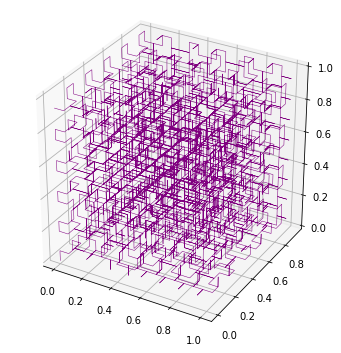

In [ ]:
hilbert = Hilbert3D(10)
hilbert.plot_hilbert_polygon(4)


## Graf posunuté 3D H. křivky

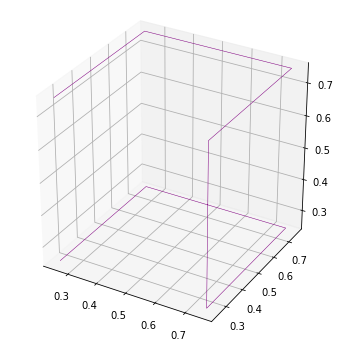

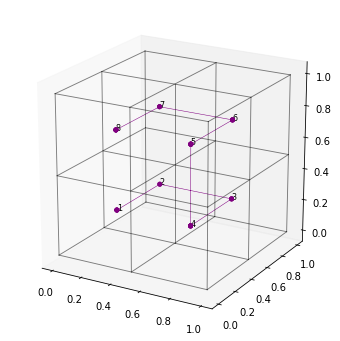

In [ ]:
hilbert.plot_mainstream_hilbert(1)
hilbert.plot_mainstream_hilbert_cubes(1)